# Estimación puntual

En este notebook ejemplificaremos la mayoría de los conceptos sobre _Estadísticas y distribuciones muestrales_, y _Estimación puntual_ vistos en el curso. La intención es que este material sea autocontenido y les ayude a reforzar sus conocimientos en los temas antes mencionados.

Este notebook se encuentra alojado en [GitHub](https://github.com/ivannpy/inferencia_estadistica).

---
Autor: Jorge Iván Reyes Hernández.

Curso: Inferencia estadística.

Profesora: Ruth Selene Fuentes García.

Facultad de Ciencias, UNAM.

In [23]:
from io import StringIO
import requests
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from scipy.special import binom
from utils import *

np.set_printoptions(precision=2)

## Introducción

### El problema fundamental de la estadística paramétrica

Recordemos que el _problema fundamental de la estadística (inferencial) paramétrica_ es que, dada una muestra aleatoria $\underline{X} = (X_1, \dots X_n)$ de tamaño $n$ (en la práctica esto se traduce a tener $n$ números $x_1, \dots, x_n$) provenientes de algún modelo de probabilidad paramétrico, $F_{\theta}$, hay que aprender/inferir el valor $\theta \in \Theta$ que generó la muestra.

En este Notebook sólo hablaremos de la estimación puntual que, a grandes rasgos, consiste en dar un valor puntual (un único número) para este parámetro (o dar un vector de números, en caso de que tengamos más de un parámetro).

Considere el siguiente listado.

In [2]:
mu: float = 0  # Media
sigma2: float = 2  # Varianza
sigma: float = np.sqrt(sigma2)  # Desviación estándar

# Generamos una muestra aleatoria de tamaño n = 500 de una población
# Normal con media 0 y varianza 2

n: int = 500  # Tamaño de la muestra
    
random_sample = stats.norm.rvs(loc=mu, scale=sigma, size=n, random_state=0)  # Muestra aleatoria


In [3]:
random_sample

array([ 2.49,  0.57,  1.38,  3.17,  2.64, -1.38,  1.34, -0.21, -0.15,
        0.58,  0.2 ,  2.06,  1.08,  0.17,  0.63,  0.47,  2.11, -0.29,
        0.44, -1.21, -3.61,  0.92,  1.22, -1.05,  3.21, -2.06,  0.06,
       -0.26,  2.17,  2.08,  0.22,  0.53, -1.26, -2.8 , -0.49,  0.22,
        1.74,  1.7 , -0.55, -0.43, -1.48, -2.01, -2.41,  2.76, -0.72,
       -0.62, -1.77,  1.1 , -2.28, -0.3 , -1.27,  0.55, -0.72, -1.67,
       -0.04,  0.61,  0.09,  0.43, -0.9 , -0.51, -0.95, -0.51, -1.15,
       -2.44,  0.25, -0.57, -2.31,  0.65, -1.28,  0.07,  1.03,  0.18,
        1.61, -1.75,  0.57, -0.97, -1.23, -0.82, -0.44,  0.08, -1.65,
        1.27,  0.66, -2.17,  2.1 ,  2.68,  1.67, -0.25, -1.51,  1.49,
       -0.57,  1.73,  0.29,  1.38,  0.5 ,  1.  ,  0.01,  2.53,  0.18,
        0.57,  2.66, -1.91, -1.8 ,  1.37, -1.66,  2.75, -0.58, -1.06,
        2.72,  2.09,  2.64,  1.28, -1.22,  2.7 , -0.38,  1.13,  1.34,
       -0.22,  0.87,  1.3 ,  0.53, -1.55,  0.42,  1.88, -0.98, -0.21,
       -0.62,  2.62,

---
_Observación_: El método .rvs() de stats.norm genera números pseudo-aleatorios de una distribución normal. El argumento loc indica la media; scale indica la desviación estándar (es por eso que no le pasamos la varianza, sigma2); size indica el tamaño de la muestra; random_state fija una _semilla_, para obtener resultados reproducibles.

---

En el listado anterior se genera una muestra aleatoria de tamaño $n=500$ de una población $\mathcal{N}(0, 2)$. En el contexto de inferencia estadística, partimos de que conocemos la muestra pero sin conocer los parámetros. Hagamos trampa y comencemos de nuevo.

Considere el siguiente conjunto de $n=500$ números


In [4]:
print_pretty_sample(random_sample)

Realización de la muestra aleatoria.
Tamaño de la muestra: 500.


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Para poder hacer inferencia (en el contexto paramétrico) tenemos que suponer que existe un modelo de probabilidad, $F_{\theta}$, que genera los datos anteriores. La pregunta natural es ¿cuál modelo?

Para responder esta pregunta vamos a usar las herramientas de la estadística descriptiva. En otras palabras, haremos un (breve) análisis descriptivo de datos (recuerde que este paso __siempre__ antecede cualquier procedimiento de inferencia). 

Comenzamos haciendo un histograma para obtener información sobre la densidad empírica.

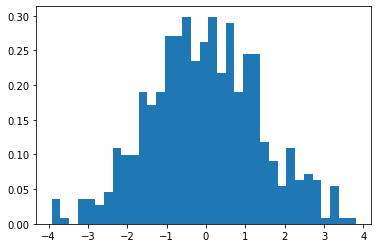

In [5]:
plt.hist(random_sample, density=True, bins=35);

Del histograma podemos observar que la densidad parece simétrica (no sesgada), se acumula alrededor de un número cercano al 0 y que aunque hay dispersión, no es grande, pues todos los valores están entre -4 y 4. Además, a ojo, ese histograma parece una densidad normal (en el curso de Estadística II verán herramientas -pruebas estadísticas- para justificar esto).

Con lo anterior, parece hacer sentido que nuestra muestra provenga de una población Normal, es decir, supondremos que tenemos la siguiente muestra aleatoria

$$
X_1, \dots, X_{500} \sim \mathcal{N}(\mu, \sigma ^{2})
$$

para algunos valores de $\mu$ y $\sigma ^{2}$ que deseamos estimar.

__Spoiler__: Como ya vimos toda la parte de inferencia, sabemos que la media muestral, $\bar{X}$, y la varianza muestral, $S^{2}$, son _buenos_ estimadores para $\mu$ y $\sigma ^{2}$, respectivamente. Con esto en mente, calculemos esos estimadores (véase la sección _Sobre cómo implementar las estadísticas_ del Notebook apéndice).


Comenzamos definiendo el estimador $T_1: \Omega \to \mathbb{R}^{2}$, dado por:

$$
\begin{align*}
    T_1(\underline{X}) &= (\bar{X}, S^{2})\\
        &= \bigg( \frac{1}{n} \sum_{i=1}^{n} X_i , \frac{1}{n-1} \sum_{i=1}^{n} (\bar{X}- X_i)^{2} \bigg)
\end{align*}
$$

Note que $T_1$ es un estimador para $\theta = (\mu, \sigma^{2})$

In [6]:
def T_1(X):
        """ Calcula la media muestral y la varianza muestral S^2.
        :param X: X es un arreglo de Numpy.
        :return: (media, s^2)
        """

        t_1 = X.mean()
        coef = 1 / (X.size - 1)
        t_2 = coef * ((X - X.mean()) ** 2).sum()
        
        return t_1, t_2
    

La estadística $T_1$ es, en principio, un vector aleatorio. Para obtener la realización del estimador, $t_1(\underline{x})$, hay que usar la realización de la muestra aleatoria (los números con los que empezamos) para evaluar el estimador.

In [7]:
mu_gorro, sigma2_gorro = T_1(random_sample)

In [8]:
print(mu_gorro)

-0.03585659197029378


In [9]:
print(sigma2_gorro)

1.9966271586284878


¡Sorpresa! El estimador $T_1$ estima que los valores reales de los parámetros $\mu$ y $\sigma^{2}$ son $\hat{\mu} \approx -0.03$ y $\hat{\sigma}^{2} \approx 1.99$. Estas estimaciones no están mal, pues los valores __reales__ de los parámetros son $\mu= 0$ y $\sigma^{2} = 2$.

Con estas estimaciones de los parámetros podríamos decir que el fenómeno que generó los números iniciales (los 500 números con los que partimos) es _aleatorio_ y es descrito por un modelo $\mathcal{N}(-0.03, 1.99)$. En este punto ya conocemos cuál es el modelo de probabilidad, por lo que podríamos aplicar todos los métodos que se estudian en Probabilidad I y II para hacer predicciones (por ejemplo, el valor más probable en caso de obtener/medir $x_{501}$). No es la intención de este Notebook hacerlo.

## Estimación por máxima verosimilitud

En la introducción se dio por hecho que la media muestral y la varianza muestral eran buenos estimadores para la media y la varianza, respectivamente, de una población normal, sin embargo estos estimadores se propusieron, no se construyeron. En esta sección vamos a ejemplificar el método de estimación por máxima verosimilitud desde cero.

El siguiente ejemplo aparece como el _Example 7.16_ de [1].

__Ejemplo 1:__ Un artículo de mayo de 2018 en www.howtogeek.com analiza los criterios tradicionales para las contraseñas "fuertes" y el consejo emergente de utilizar frases más largas concatenando varias palabras como contraseña. Supongamos que se seleccionan aleatoriamente 10 estudiantes de una determinada universidad y se comprueba que el primero, el tercero y el décimo utilizan frases largas como contraseñas de sus correos electrónicos, mientras que los otros 7 no lo hacen. Sea $p$ la proporción de estudiantes de __toda__ la universidad que utilizan frases largas como contraseñas de sus correos electrónicos. Defina las variables aleatorias $X_1, \dots, X_{10}$ tales que,

$$
X_i = 
\begin{cases} 
    1 &\text{si el i-ésimo estudiante usa una frase larga como contraseña} \\
    0 &\text{c.o.c}
\end{cases}
$$

Claramente, $X_i \sim Ber(p)$, $p \in \Theta = [0,1]$

De la información del problema sabemos que tenemos una muestra aleatoria de tamaño 10, dada por
$$
x_1 = 1, x_2=0, x_3 = 1, x_4 = 0, x_5 = 0, x_6 = 0, x_7 = 0, x_8 = 0, x_9 = 0, x_{10} = 1
$$

También tiene sentido que las variables aleatorias sean independientes, pues generalmente las personas eligen sus contraseñas sin influencia de otra persona.

La probabilidad de haber observado _exactamente_ esa muestra está dada por la función de __verosimilitud__ (a.k.a función de probabilidad conjunta),

$$
\begin{align*}
    L(p| \underline{X}) :&= \mathbb{P}(X_1 = x_1, \dots, X_{10} = x_{10}) \\
        &= f_{X_1, \dots X_{10}}(x_1, \dots x_n; p) \\ 
        &= \prod _{i=1}^{10} f_{X_i}(x_i;p) \\
        &= \prod _{i=1}^{10} p ^{x_i} (1-p)^{1-x_i}
\end{align*}
$$

Como conocemos los valores $x_i$, podemos sustituirlos en la función de verosimilitud,

$$
\begin{align*}
    L(p| \underline{x}) &= \prod _{i=1}^{10} p ^{x_i} (1-p)^{1-x_i} \\
        &= p ^{x_1} (1-p)^{1-x_1} \cdot \dots \cdot p ^{x_{10}} (1-p)^{1-x_{10}} \\
        &= p (1 - p) p (1 - p) (1 - p) (1 - p) (1 - p) (1 - p) (1 - p) p \\
        &= p^{3} (1-p)^{7}
\end{align*}
$$

Note que una vez que conocemos los valores que toma la muestra aleatoria, la función de verosimilitud únicamente es función de los parámetros.

A continuación se muestra a gráfica de $L:[0,1] \subset \mathbb{R} \to \mathbb{R}$.

In [10]:
def L_1(p, x):
    """ Implementación de la función de verosimilitud.
        
    Esta implementación admite que le pasemos un vector, x, con la muestra aleatoria, 
    por lo que es más robusta/general.
    """
    if 0 <= p <= 1:
        likelihood = 1
        for xi in x:
            likelihood *= (p ** xi)*((1 - p)**(1 - xi))  
        return likelihood
    else:
        return 0

def L(p):
    """ Implementación de la función de verosimilitud.
    
    Implementa L para los valores específicos de la muestra aleatoria.
    """
    if 0 <= p <= 1:
        return np.power(p, 3) * np.power(1 - p, 7)
    else:
        return 0


In [11]:
# Cargamos la muestra aleatoria
sample_students = load_data("ejemplo_estudiantes.csv")

# Posibles valores de p (espacio parametral)
dom = np.linspace(0, 1)

# Valores que toma la función de verosimilitud
L_plot = np.array([L(p) for p in dom])

# Valores que toma la función de verosimilitud
L_1_plot = np.array([L_1(p, sample_students) for p in dom])


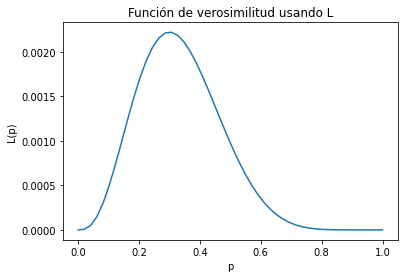

In [12]:
plt.title("Función de verosimilitud usando L")
plt.xlabel("p")
plt.ylabel("L(p)")
plt.plot(dom, L_plot);


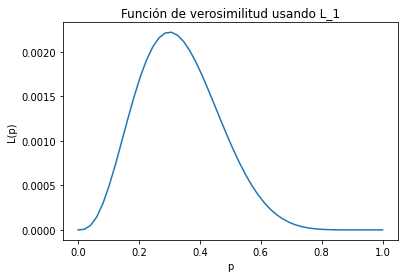

In [13]:
plt.title("Función de verosimilitud usando L_1")
plt.xlabel("p")
plt.ylabel("L(p)")
plt.plot(dom, L_1_plot);


Recordemos que el __principio de máxima verosimilitud__ nos dice que el estimador (de máxima verosimilitud) es aquel que maximiza la función de verosimilitud, $L$. 

De la gráfica anterior (que casualmente es la gráfica de $L$) podemos ver, a ojo, que el valor de $p$ que maximiza la función $L$ está cerca de 0.3. Para encontrar el valor exacto necesitamos un algoritmo que encuentre este valor máximo.

__Observación:__ Note que los arreglos _dom_ y _L\_1_ contienen los valores del dominio y contradominio, respectivamente. Es decir, cada elemento de _L\_1_ es la imagen de cada elemento en _dom_ bajo la función de verosimilitud.

La función de numpy, argmax(), calcula la posición (en el arreglo) que contiene al valor más grande (el máximo). Sabiendo la posición (en el arreglo) podemos saber a qué valor del dominio corresponde esa imagen (el valor máximo).

A continuación se muestran los valores del dominio y su respectiva imagen bajo la función de verosimilitud.


In [14]:
print("L(p)    = p^{3} (1-p)^{7}")
for p, L_p in zip(dom, L_1_plot):
    print(f"L({p:.3f}) = {L_p:.7f}")

L(p)    = p^{3} (1-p)^{7}
L(0.000) = 0.0000000
L(0.020) = 0.0000074
L(0.041) = 0.0000508
L(0.061) = 0.0001475
L(0.082) = 0.0002997
L(0.102) = 0.0005002
L(0.122) = 0.0007358
L(0.143) = 0.0009910
L(0.163) = 0.0012497
L(0.184) = 0.0014969
L(0.204) = 0.0017199
L(0.224) = 0.0019085
L(0.245) = 0.0020559
L(0.265) = 0.0021577
L(0.286) = 0.0022126
L(0.306) = 0.0022216
L(0.327) = 0.0021877
L(0.347) = 0.0021156
L(0.367) = 0.0020109
L(0.388) = 0.0018800
L(0.408) = 0.0017295
L(0.429) = 0.0015660
L(0.449) = 0.0013959
L(0.469) = 0.0012247
L(0.490) = 0.0010574
L(0.510) = 0.0008981
L(0.531) = 0.0007500
L(0.551) = 0.0006153
L(0.571) = 0.0004955
L(0.592) = 0.0003912
L(0.612) = 0.0003025
L(0.633) = 0.0002286
L(0.653) = 0.0001685
L(0.673) = 0.0001209
L(0.694) = 0.0000842
L(0.714) = 0.0000566
L(0.735) = 0.0000367
L(0.755) = 0.0000227
L(0.776) = 0.0000134
L(0.796) = 0.0000074
L(0.816) = 0.0000038
L(0.837) = 0.0000018
L(0.857) = 0.0000008
L(0.878) = 0.0000003
L(0.898) = 0.0000001
L(0.918) = 0.0000000
L(0.939)

A ojo podemos ver que el valor máximo de $L$ se alcanza cerca de $0.306$. 
Podemos hacer eso de manera automática con np.argmax() para encontrar el indice del elemento en el dominio que maximiza $L(p)$ y luego buscar el elemento en el dominio usando ese índice.


In [15]:
# Posición del valor máximo de L
index_max = np.argmax(L_1_plot)

print(index_max)

15


In [16]:
# Valor en el dominio en esa pocisión
p_max = dom[index_max]

print(p_max)

0.3061224489795918


El valor de $p \in [0,1]$ que maximiza la función de verosimilitud, $L(p)$, es $p_{max} \approx 0.306$. De donde podemos concluir que el estimador máximo verosimil es $\hat{p}_{ML} = 0.306$

Habriamos obtenido lo mismo de haber usado la log-verosimilitud, $l$.

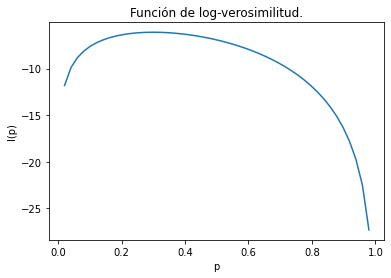

In [17]:
supress("ignore")

log_L = np.log(L_1_plot)

plt.title("Función de log-verosimilitud.")
plt.xlabel("p")
plt.ylabel("l(p)")
plt.plot(dom, log_L);

In [18]:
index_max_log = np.argmax(log_L)
p_max_log = dom[index_max_log]

print(p_max_log)

0.3061224489795918


No es difícil encontrar analíticamente que el estimador de máxima verosimilitud es $\hat{p}_{ML} = \frac{3}{10} = 0.3$, es cual es muy cercano al encontrado numéricamente.

__Ejemplo 1 (continuación):__ En el ejemplo anterior conocíamos explícitamente la muestra aleatoria de tamaño $10$. Ahora suponga que no la conocemos y que la única información que tenemos es que $3$ de los $10$ estudiantes usan frases largas como contraseñas. Esto significa que tenemos una variable aletoria $Y$ con distribución $Binom(10,p)$ (recuerde que la distribución binomial cuenta el número de éxitos en una sucesión de $n$ ensayos bernoulli, donde el éxito del ensayo es que el estudiante use una frase larga como contraseña) que toma el valor $3$.

Note que $Y = \sum _{i=1}^{10} X_i$. Esto debe recordarnos al concepto de suficiencia. No es difícil comprobar que $Y(\underline{X})$ es una estadística suficiente, por lo que basta saber que $Y=3$, para tener la misma información que teníamos con toda la muestra (y por lo tanto podremos hacer la mismas inferencias).

Véamoslo.

Del ejercicio anterior,
$$
\begin{align*}
    L(p| \underline{x}) &= \prod _{i=1}^{10} p ^{x_i} (1-p)^{1-x_i} \\
        &= p^{\sum _{i=1}^{10} x_i} (1-p)^{10 - \sum _{i=1}^{10} x_i}
\end{align*}
$$

de donde, si sabemos que $Y = \sum _{i=1}^{10} X_i = 3$, obtenemos la misma función de verosimilitud (y por lo tanto, las mismas inferencias).

__Ejemplo 2:__ (Ejemplo 7.24 de [1]). Un método utilizado a menudo para estimar el tamaño de una población de vida silvestre implica realizar un experimento de captura/recaptura. En este experimento, se captura una muestra inicial de $M$ animales; cada uno de estos se etiqueta y se regresan a su población. Después de dejar pasar suficiente tiempo para que los animales etiquetados se mezclen en su población, se captura otra muestra de tamaño $n$. Si $X$ indica la cantidad de animales etiquetados en la segunda muestra (si se recaptura un animal de la primera muestra esta ya no es re-etiquetado), el objetivo es usar la $X$ observada, $x$, para estimar el tamaño de la población, $N$.

Si pensamos como "éxito" haber recapturado un animal, entonces tenemos muestreo sin reemplazo de una población con $M$ éxitos y $N-M$ fallos. Entonces $X$ es una variable aleatoria hipergeométrica con función de densidad,

$$
\begin{align*}
    f_{X}(x;n,M,N) &= L(N) \\
        &= \frac{\binom{M}{x} \binom{N-M}{n-x}}{\binom{N}{n}}
\end{align*}
$$

Note que $L: [200, \infty] \subset \mathbb{N} \to \mathbb{R}$ es una función discreta (una sucesión), no la podemos derivar!

En este caso queremos estimar $N$.

Suponga que $M=200$ peces son capturados de un lago y etiquetados. Después, $n=100$ peces son  capturados, de los cuales hay $x=11$ peces que ya estaban etiquedados. La función de verosimilitud es,

$$
\begin{align*}
   L(N) &= \frac{\binom{M}{x} \binom{N-M}{n-x}}{\binom{N}{n}} \\
       &= \frac{\binom{200}{11} \binom{N-200}{100-11}}{\binom{N}{100}} \\
\end{align*}
$$

Queremos obtener el estimador de máxima verosimilitud para $N$.

In [19]:
def L_fish(N):
    """ Función de verosimilitud.
    
    Calcula la función de verosimilitud.
    
    :param N: El parámetro.
    :return: La función de verosimilitud o lanza la excepción ArithmeticError si N < 200.
    
    """
    if N >= 200:
        aux_1 = binom(200, 100)
        aux_2 = binom(N - 200, 100-11)
        aux_3 = binom(N, 100)

        return (aux_1 * aux_2) / (aux_3)
    else:
        raise ArithmeticError


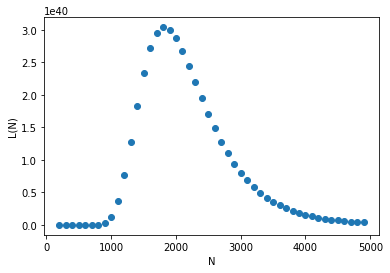

In [20]:
N_dom = np.arange(200, 5000)
L_values = np.array([L_fish(N) for N in N_dom])

plt.scatter(N_dom[::100], L_values[::100])
plt.xlabel("N")
plt.ylabel("L(N)");

La gráfica anterior muestra la función de verosimilitud, $ L:[200, 5000] \subset \mathbb{N} \to \mathbb{R}$. El estimador de máxima verosimilitud es aquel valor de $N$ que maximiza $L$.

Como se mencionó anteriormente, $L$ es una función no derivable. Encontraremos su máximo de manera análoga al caso anterior.

In [21]:
L_index_max = np.argmax(L_values)
L_max = N_dom[L_index_max]

print(L_max)

1818


Es decir, el estimador de máxima verosimilitud es $\hat{N}_{ML} = 1818$, por lo que se estima que la población total de peces sea $1818$.

Adicionalmente, podemos calcular el estimador por momentos. Igualamos el primer momentos poblacional con el primer momento muestral.

$$
\begin{align*}
    \mathbb{E}(X) &= X \\
    n \frac{M}{N} &= X \\
    (100) \frac{200}{N} &= 11 \\
    N &= 1818.18 \\
    \hat{N}_{momentos} &= 1818
\end{align*}
$$

Note que en este caso ambos estimadores coindicen.

### Modelo logístico



__Ejemplo 3:__ En 1986, el transbordador espacial Challenger explotó durante el despegue, matando a los siete astronautas que iban a bordo. La explosión fue el resultado de un fallo en la junta tórica, la rotura de un anillo de goma que sella las partes de la nave. Se cree que el accidente fue causado por el clima inusualmente frío ($31 ^o$F o $0$ $^o$C) en el momento del lanzamiento, ya que hay razones para creer que las probabilidades de fallo de la junta tórica aumentan a medida que la temperatura disminuye <br>
    Los datos sobre los lanzamientos anteriores del transbordador espacial y los fallos de las juntas tóricas figuran en el conjunto de datos challenger proporcionado con el paquete mcsm. La primera columna corresponde a los indicadores de fallo $y_i$ y la segunda a la temperatura correspondiente $x_i$ $(1 ≤ i ≤ 24)$
    
1. Ajuste este conjunto de datos con una regresión logística, donde
$$
    P(Y_i=1 |x_i) = p(x_i) = \frac{\exp(\alpha + \beta x_i)}{1 + \exp(\alpha + \beta x_i)}
$$
Deduce los estimadores máximo verosimiles para $\alpha$ y $\beta$, junto con los errores  estándar.


__Solución:__

Sea $X = \{x_1, ..., x_n \} \subset \mathbb{R}$ el conjunto de datos e $y = \{y_1,...,y_n \}$ $\forall i \in \{1,...,n\}$ $y_i \in \{ 0,1\}$ el conjunto de varibles respuesta. <br>
En nuestro problema 
$$
    x_i : \text{temperatura} \\ 
    y_i : \text{indicador de fallo}
$$
Como las covariables $x_i$ son $1-\text{dimensional}$, el modelo propuesto es
$$
    p_i = p_i (\vec \beta) = \mathbb{P}(y_i = 1 | x_i) = \frac{\exp(\beta_0 + \beta_1 x_i)}{1 + \exp(\beta_0 + \beta_1 x_i)}
$$
con $\vec \beta = (\beta_0, \beta_1) \in \mathbb{R}^2$ el vector de parámetros. <br>
Como las variables respuesta son binarias, podemos considerarlas como ensayos Bernoulli:
$$
    Y_i | X_i = x_i \sim \text{Bernoulli}(p_i)
$$
donde, por hipótesis, estamos considerando que la probabilidad de éxito de los ensayos es $p_i$, dada por el modelo de regresión logística. Entonces
$$
    f_{Y|X}(Y_i | X_i = x_i) = p_i ^{y_i} (1-p_i)^{1-y_i}
$$
por lo que la función de verosimilitud es
$$
    f_{Y|X}(Y_1 | X_1 = x_1,..., Y_n | X_n = x_n) = \prod _{i=1} ^n f_{Y|X}(Y_i | X_i = x_i) = \prod p_i ^{y_i} (1-p_i)^{1-y_i}
$$
$$\Rightarrow \mathcal{L} (\vec \beta) = \prod p_i ^{y_i} (1-p_i)^{1-y_i}$$
El estimador máximo verisimil de $\vec \beta$ es
$$
    \hat \beta _{ML} = \text{arg}\max _{\vec \beta \in \mathbb{R}^2} \mathcal{L} (\vec \beta)
$$
Mientras que el error estándar $\hat{se}$ de $\hat \beta _{ML} = (\hat\beta_0, \hat\beta_1)$ es la diagonal de la inversa de la matriz de información de Fisher
$$
    \hat{se}(\hat \beta_0) = \mathbb{E}\left[\frac{\partial ^2}{\partial \beta _0 ^2} \ln\mathcal{L} (\vec \beta)\right] \\
    \hat{se}(\hat \beta_1) = \mathbb{E}\left[\frac{\partial ^2}{\partial \beta _1 ^2} \ln\mathcal{L} (\vec \beta)\right]
$$
Para encontrar los valores usaremos el paquete statsmodels de Python


Como el dataset es de R, lo bajamos de internet

In [24]:
# Bajamos el dataset de internet
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/challenger.csv'
s = requests.get(url).text

dataset = pd.read_csv(StringIO(s))

# Preprocesamiento
dataset.replace(2, 1, inplace=True)
dataset['distress_ct'][20] = 1

dataset.head()

,o_ring_ct,distress_ct,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,1
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


Una vez preprocesados, nos quedamos con los datos que nos interesan: temperatura e indicador de fallo

In [25]:
X = np.array(dataset['temperature']).reshape(-1,1)
y = np.array(dataset['distress_ct']).reshape(-1,)

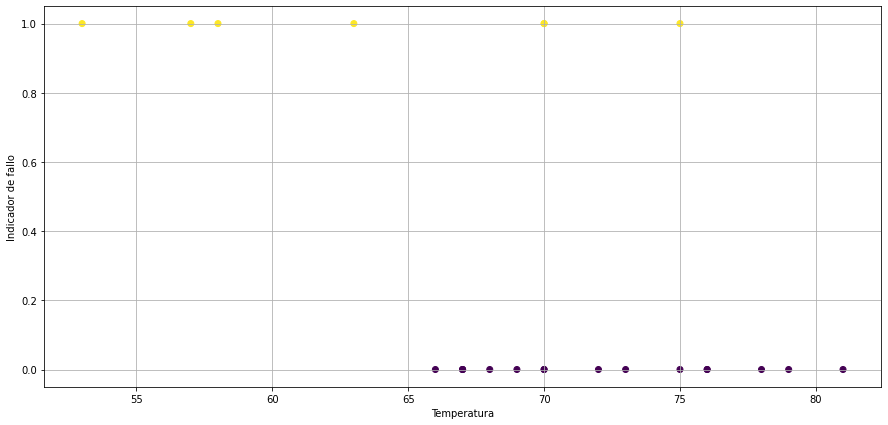

In [26]:
plt.figure(figsize=(15,7))
plt.scatter(X, y, c=y)
plt.xlabel('Temperatura'), plt.ylabel('Indicador de fallo')
plt.grid(True);

Creamos el vector $X = [1, \text{Temperatura}]$ y ajustamos el modelo de regresión logística usando máxima verosimilitud.

In [27]:
X = sm.add_constant(X)

model = sm.Logit(y, X) # Modelo logit
log_reg = model.fit()

log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 Oct 2022   Pseudo R-squ.:                  0.2813
Time:                        21:46:19   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
Covariance Type:            nonrobust   LLR p-value:                  0.004804
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0429      7.379      2.039      0.041       0.581      29.505
x1            -0.2322      0.108     -2.145      0.032      -0.444      -0.020
==============================================================================
"""

Podemos ver que los estimadores máximo verosimiles son:
$$
    \hat \beta _{0 ML}= 15.0429 \\
    \hat \beta_{1ML} = - 0.2322
$$
Con errores estándar:
$$
    \hat{\text{se}}(\hat \beta_{0 ML}) = 7.379 \\
    \hat{\text{se}} (\hat \beta_{ 1ML}) = 0.108 \\
$$
A continuación se muestra la gráfica de la regresión

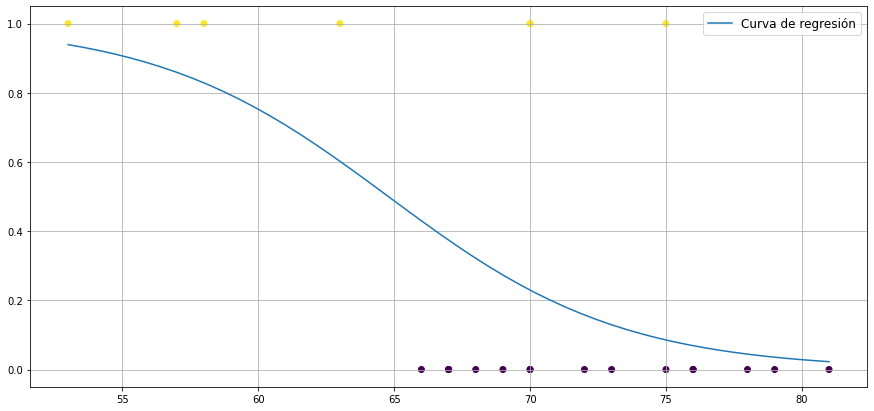

In [28]:
beta0_ML = 15.0429
beta1_ML = -0.2322
se0_ML = 7.379
se1_ML = 0.108

x_dom = np.linspace(min(X[:,1]), max(X[:,1]))
regresion = lambda beta0, beta1: np.exp(beta0 + beta1*x_dom) / (1 + np.exp(beta0 + beta1*x_dom))

plt.figure(figsize=(15,7))
plt.plot(x_dom, regresion(beta0_ML, beta1_ML), label='Curva de regresión')
plt.scatter(X[:,1], y, c=y)
plt.legend(prop={'size': 12})
plt.grid(True);

2. Suponga que tenemos nuevos datos $X_{test} = \{ 40, 50, 60\}$. Queremos calcula la probabilidad de que a estas temperaturas, haya falla
$$
    \mathbb{P}(Y=1|X_{test})
$$


In [29]:
predictor = lambda x, beta0, beta1: np.exp(beta0 + beta1 * x) / (1 + np.exp(beta0 + beta1 * x))

X_test = np.array([60, 50, 40])

# Predicción usando los parámetros estimados
y_pred_ML = predictor(X_test, beta0_ML, beta1_ML)

for i in range(len(X_test)):
    print(f'Temperatura:{X_test[i]}')
    print(f'Probabilidad de fallo (Máxima verosimilitud) {y_pred_ML[i]:.3f}')


Temperatura:60
Probabilidad de fallo (Máxima verosimilitud) 0.752
Temperatura:50
Probabilidad de fallo (Máxima verosimilitud) 0.969
Temperatura:40
Probabilidad de fallo (Máxima verosimilitud) 0.997


## Evaluación de parámetros

## Consistencia

## Eficiencia asintótica

## El aprendizaje es estimación de parámetros

La idea de hacer estimación puntual es, como ya se dijo, estimar parámetros puntualmete. Esta misma idea es el principio por el cual modelos más robustos (por ejemplo, redes neuronales) funcionan. 

_Definición (red neuronal completamente conectada):_

# Referencias

[1]. Devore, Berk and Carlton. Modern Mathematical Statistics with Applications. Springer.

[2]. https://towardsdatascience.com/inroduction-to-neural-networks-in-python-7e0b422e6c24